# Worksheet 21

Name:  Ziliang  Wang  
UID: U47271531   

### Topics

- Logistic Regression

## Logistic Regression

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

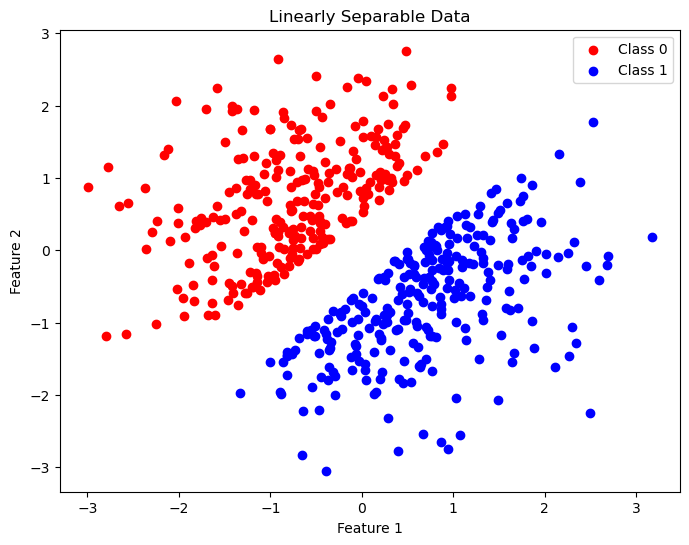

In [8]:
# Generate the data
X, Y = generate_line_data()

# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='blue', label='Class 1')
plt.title('Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

b) Fit a logistic regression model to the data a print out the coefficients.

In [9]:
model = LogisticRegression().fit(X, Y)
model.coef_
model.intercept_

array([0.05839469])

c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

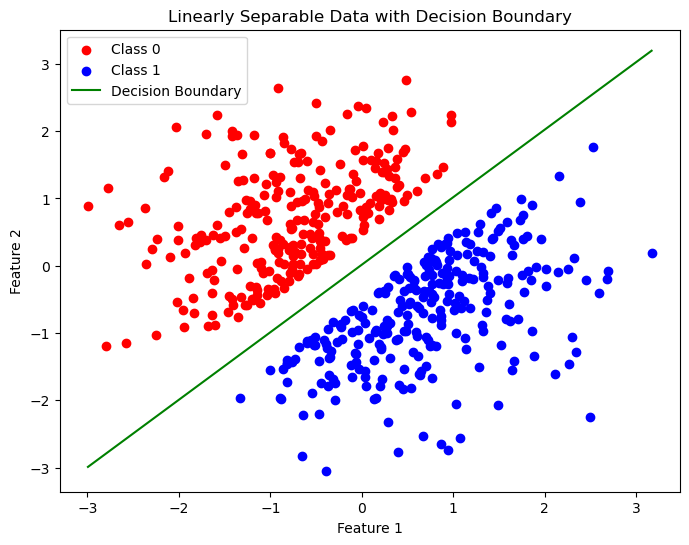

In [11]:
# Fit a logistic regression model to the data
model = LogisticRegression().fit(X, Y)

# Extract coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_[0]

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='blue', label='Class 1')

# Plot the decision boundary
x_values = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
y_values = -(coef[0] / coef[1]) * x_values - (intercept / coef[1])
plt.plot(x_values, y_values, label="Decision Boundary", color='green')

# Customize the plot
plt.title('Linearly Separable Data with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Show the plot
plt.show()


d) Using the above code, generate and plot the CIRCLE data.

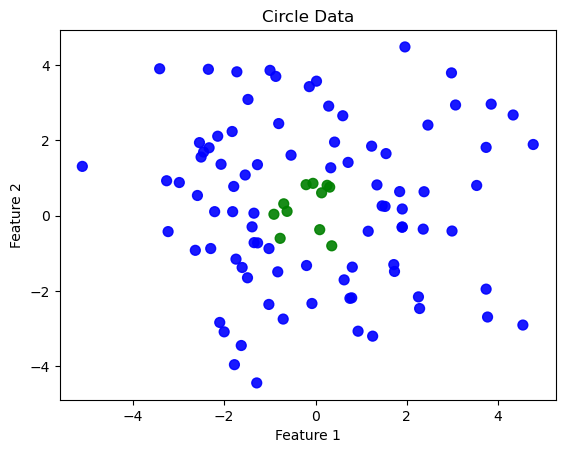

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

# Centers for data generation
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=100, centers=centers, cluster_std=2, random_state=0)

# Function to generate circle data
def generate_circle_data(t):
    X = np.array(list(filter(lambda x: (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or 
                                       (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# Generate circle data
X_circle, y_circle = generate_circle_data(t)

# Colors for the classes
cs = np.array(['g', 'b'])

# Plotting the circle data
fig, ax = plt.subplots()
ax.scatter(X_circle[:, 0], X_circle[:, 1], color=cs[y_circle].tolist(), s=50, alpha=0.9)
plt.title('Circle Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Creating a polynomial feature transformer (only including squared terms)
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

X_circle_transformed = poly.fit_transform(X_circle)

model_circle = LogisticRegression().fit(X_circle_transformed, Y_circle)

coefficients_circle = model_circle.coef_
intercept_circle = model_circle.intercept_

coefficients_circle, intercept_circle




(array([[ 0.02985162, -0.04753247,  4.90954898,  0.37928   ,  4.95645605]]),
 array([-6.47659385]))

f) Plot the decision boundary using the code below.

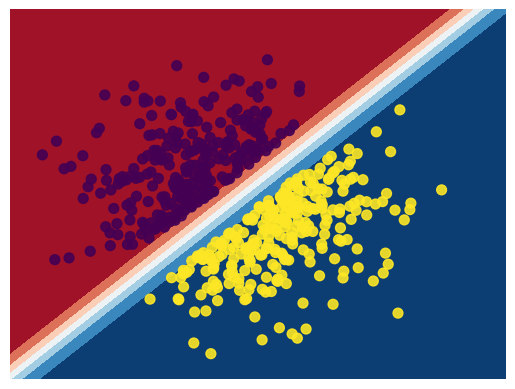

In [ ]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, alpha=0.9)
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sklearn.datasets as datasets

# Implement a simple logistic regression using gradient descent
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None
        self.history = []  # To store the coefficient history for each epoch

    def fit(self, X, y):
        # Initialize coefficients
        self.coef_ = np.zeros(X.shape[1])
        self.intercept_ = 0

        # Gradient descent
        for _ in range(self.epochs):
            model_outputs = self.predict_proba(X)
            errors = y - model_outputs
            self.coef_ += self.learning_rate * np.dot(X.T, errors)
            self.intercept_ += self.learning_rate * np.sum(errors)
            
            # Store the current state of the model
            self.history.append((self.intercept_, self.coef_.copy()))

    def predict_proba(self, X):
        return 1 / (1 + np.exp(-(np.dot(X, self.coef_) + self.intercept_)))

# Generate data (use the circle data or any other data you have)
# X, y = ...

# Train the model
model = LogisticRegressionGD(learning_rate=0.01, epochs=100)
model.fit(X, y)

# Function to update each frame in the animation
def update_plot(i, X, y, model_history, ax):
    ax.clear()
    intercept, coef = model_history[i]
    ax.scatter(X[:, 0], X[:, 1], c=y)
    x_values = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
    y_values = -(coef[0] / coef[1]) * x_values - (intercept / coef[1])
    ax.plot(x_values, y_values, color='red')
    ax.set_title(f'Epoch: {i+1}')

# Create the animation
fig, ax = plt.subplots()
ani = FuncAnimation(fig, update_plot, frames=len(model.history), fargs=(X, y, model.history, ax))

# Save or display the animation
# ani.save('logistic_regression_animation.gif', writer='imagemagick')
plt.show()


NameError: name 'y' is not defined

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

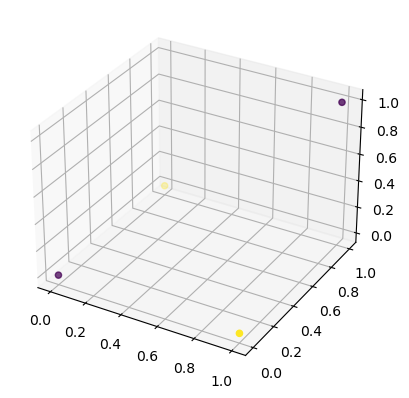

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = generate_xor_data()
ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
plt.show()

h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

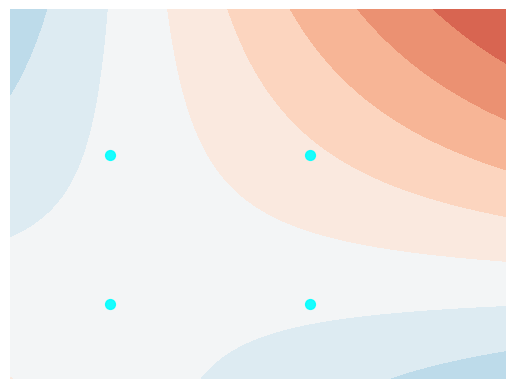

In [ ]:
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=0)
model = make_pipeline(poly, lr).fit(X, Y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=Y, s=50, alpha=0.9)
plt.show()

In [ ]:
%matplotlib widget
for i in range(20000):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
        X_transform = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)
        model = LogisticRegression(verbose=0, solver=solver, random_state=i, max_iter=10000)
        model.fit(X_transform, Y)
        print(model.score(X_transform, Y))
        if model.score(X_transform, Y) > .75:
            print("random state = ", i)
            print("solver = ", solver)
            break

print(model.coef_)
print(model.intercept_)

xx, yy = np.meshgrid([x / 10 for x in range(-1, 11)], [x / 10 for x in range(-1, 11)])
z = - model.intercept_ / model.coef_[0][2] - model.coef_[0][0] * xx / model.coef_[0][2] - model.coef_[0][1] * yy / model.coef_[0][2]

ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
ax.plot_surface(xx, yy, z, alpha=0.5)
plt.show()

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

In [ ]:
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2,
                                random_state=0)

# CIRCLES
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

X, Y = ...

poly = PolynomialFeatures(2)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr).fit(X, Y)

...